From: <https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/>

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = np.array([iris.target_names[i] for i in iris.target])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


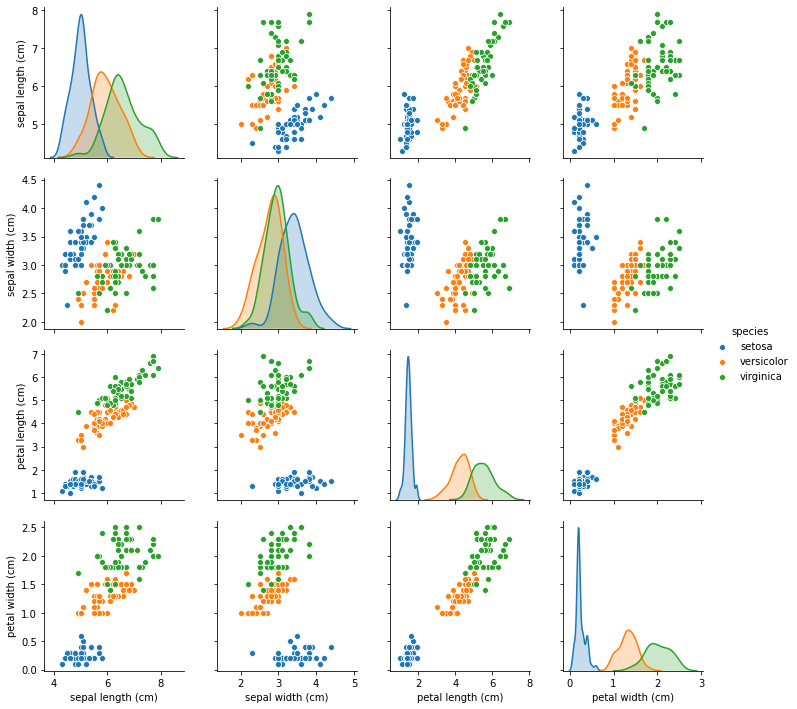

In [4]:
import seaborn as sns

sns.pairplot(df, hue="species");

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(
    df[iris.feature_names], 
    iris.target, 
    test_size=0.5, 
    stratify=iris.target, 
    random_state=123456,
)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores_tree = []
scores_loss = []

for n in range(1, 40):
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=123456)
    rf.fit(X_train, y_train)

    predicted = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)

    scores_tree.append(n)
    scores_loss.append(1 - rf.oob_score_)

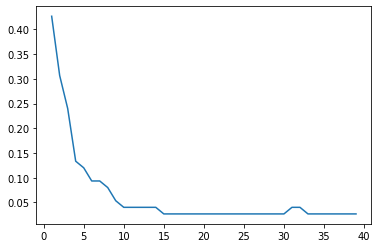

In [7]:
import matplotlib.pyplot as plt

plt.plot(scores_tree, scores_loss);